In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from numpy.random import default_rng

#dataset ou joueur 1 gagne tout le temps
df=pd.read_csv("./../data_formatted/training_dgl_dataset.csv",low_memory=False)
df.match_date = df.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [50]:
df.dtypes

index                                  int64
match_id                              object
match_date                    datetime64[ns]
match_round_order                      int64
match_order                            int64
player1_name                          object
player1_id                            object
player1_weight                       float64
player1_height                       float64
player1_birthdate                     object
player1_turned_pro                   float64
player1_atprank                      float64
player1_oddsB365                     float64
player1_oddsPS                       float64
player2_name                          object
player2_id                            object
player2_weight                       float64
player2_height                       float64
player2_birthdate                     object
player2_turned_pro                   float64
player2_atprank                      float64
player2_oddsB365                     float64
player2_od

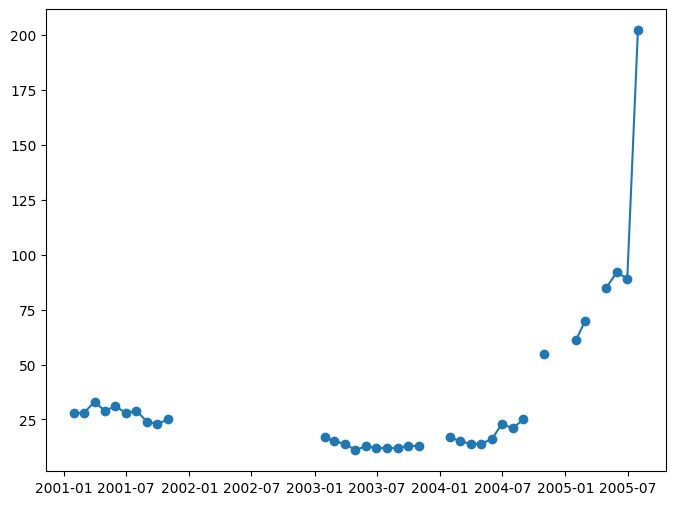

In [48]:
# Progression du rank ATP dans le temps pour le joueur ciblé
# on prend la dernière valeur observé dans le mois
# On observe que certains joueurs font des pauses qui peuvent aller à 2 ans
# Un modèle internet prend les 50 dernières valeurs connues, ce qui pour une valeur par mois correspondrait à 4 ans et 2 mois
# Pour les valeurs non connues, on pourrait utiliser le dernier rank connu.
playerID = "s572"
column_mapping = {
    'match_date': 'match_date',
    'player1_atprank': 'player_atprank',
    'player2_atprank': 'player_atprank'
}

matchswon = df.loc[df["player1_id"]==playerID, ["match_date","player1_atprank"]].rename(columns=column_mapping)
matchslost = df.loc[df["player2_id"]==playerID, ["match_date","player2_atprank"]].rename(columns=column_mapping)
matchs = pd.concat([matchswon, matchslost], ignore_index=True)
df_monthly = matchs.resample('M', on='match_date').last()
plt.figure(figsize=(8, 6))
plt.plot(df_monthly.index, df_monthly['player_atprank'], marker='o', linestyle='-')

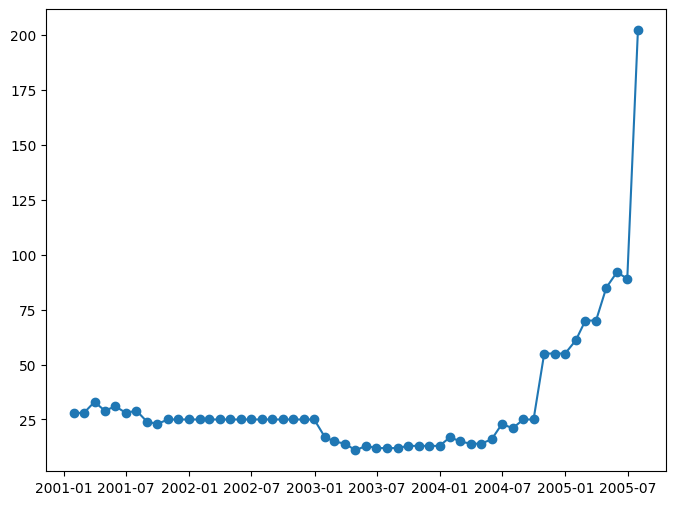

In [49]:
# Code en replaçant les valeur non connues
# au bilan, l'évolution est faible sur une plage de 4ans, sauf en fin de carrière
# L'impact attendu ici est faible, on peut juste expérer que d'autres joueurs ont des variation plus intéressantes

playerID = "s572"
column_mapping = {
    'match_date': 'match_date',
    'player1_atprank': 'player_atprank',
    'player2_atprank': 'player_atprank'
}

matchswon = df.loc[df["player1_id"]==playerID, ["match_date","player1_atprank"]].rename(columns=column_mapping)
matchslost = df.loc[df["player2_id"]==playerID, ["match_date","player2_atprank"]].rename(columns=column_mapping)
matchs = pd.concat([matchswon, matchslost], ignore_index=True)
df_monthly = matchs.resample('M', on='match_date').last()
df_monthly = df_monthly.fillna(method='ffill')
plt.figure(figsize=(8, 6))
plt.plot(df_monthly.index, df_monthly['player_atprank'], marker='o', linestyle='-')

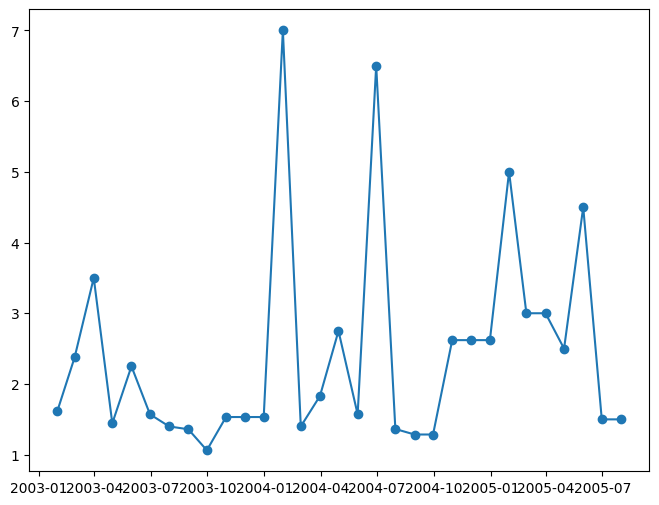

In [52]:
# On pourrait faire la même chose avec la cote du joueur
# Il est d'ailleurs très intéressant de voir des variations qui ne sont pas présentes sur le rank pour un même joueur
# Cela s'explique par le fait que la cote est influencé par d'autres métriques
# comme il s'agit d'un assemblage de joueurs adverses , ce n'est pas nécessairement judicieux de le placer dans le lstm

playerID = "s572"
column_mapping = {
    'match_date': 'match_date',
    'player1_oddsB365': 'player_odds',
    'player2_oddsB365': 'player_odds'
}

matchswon = df.loc[df["player1_id"]==playerID, ["match_date","player1_oddsB365"]].rename(columns=column_mapping)
matchslost = df.loc[df["player2_id"]==playerID, ["match_date","player2_oddsB365"]].rename(columns=column_mapping)
matchs = pd.concat([matchswon, matchslost], ignore_index=True)
df_monthly = matchs.resample('M', on='match_date').last()
df_monthly = df_monthly.fillna(method='ffill')
plt.figure(figsize=(8, 6))
plt.plot(df_monthly.index, df_monthly['player_odds'], marker='o', linestyle='-')

In [56]:
# pour obtenir des id de players supplémentaires 
df.player1_id.unique()

array(['h355', 'm590', 'k267', 'k316', 's572', 'e140', 'a226', 'p045',
       'v211', 'b599', 'c361', 'j148', 'm595', 'r286', 'u032', 'v195',
       'd362', 'y061', 'p226', 'b397', 'g319', 'v250', 's677', 'k317',
       'a006', 'p491', 'r419', 's688', 't243', 'v166', 'w254', 'h432',
       'h336', 'c487', 's331', 'p280', 'j129', 'r336', 'g333', 'l360',
       'm680', 'm655', 'p436', 't136', 'v175', 's681', 'h377', 'n250',
       'f324', 'b446', 'g379', 'b503', 'i052', 'r214', 's424', 's636',
       'w136', 'k310', 'g352', 'm475', 'r368', 'b487', 'c252', 'm543',
       'r237', 'w217', 'z073', 'k293', 's741', 's402', 'a092', 'f316',
       'f196', 's568', 'r255', 'a202', 'b484', 'c478', 'c433', 'c514',
       'c524', 'd402', 'd198', 'h380', 'k319', 'l290', 'l336', 'm614',
       'm442', 'm605', 'n210', 'p395', 'p273', 's604', 's545', 's381',
       'w212', 'd316', 'h366', 'n301', 'a311', 'e138', 'g415', 'h256',
       'h365', 'm578', 's721', 'i034', 'b350', 'b588', 'k237', 'l386',
      

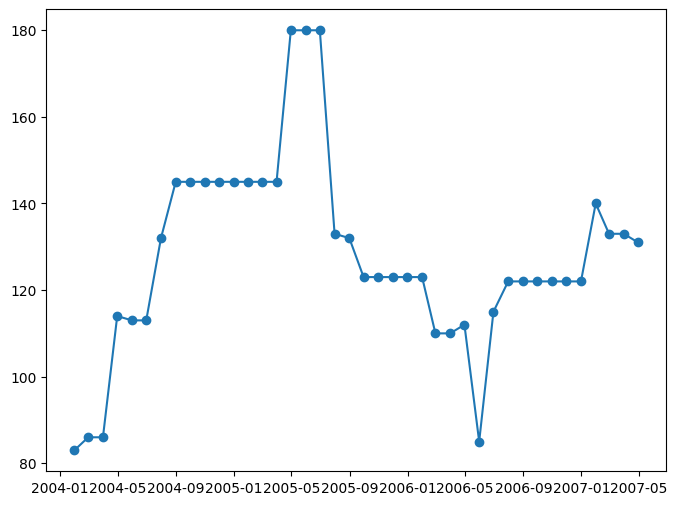

In [68]:
# Un autre joueur ou la courbe est un peu plus intéressante

playerID = "p305"
column_mapping = {
    'match_date': 'match_date',
    'player1_atprank': 'player_atprank',
    'player2_atprank': 'player_atprank'
}

matchswon = df.loc[df["player1_id"]==playerID, ["match_date","player1_atprank"]].rename(columns=column_mapping)
matchslost = df.loc[df["player2_id"]==playerID, ["match_date","player2_atprank"]].rename(columns=column_mapping)
matchs = pd.concat([matchswon, matchslost], ignore_index=True)
df_monthly = matchs.resample('M', on='match_date').last()
df_monthly = df_monthly.fillna(method='ffill')
df_monthly= df_monthly[-40:] # To get the last 40 values of the serie 
plt.figure(figsize=(8, 6))
plt.plot(df_monthly.index, df_monthly['player_atprank'], marker='o', linestyle='-')

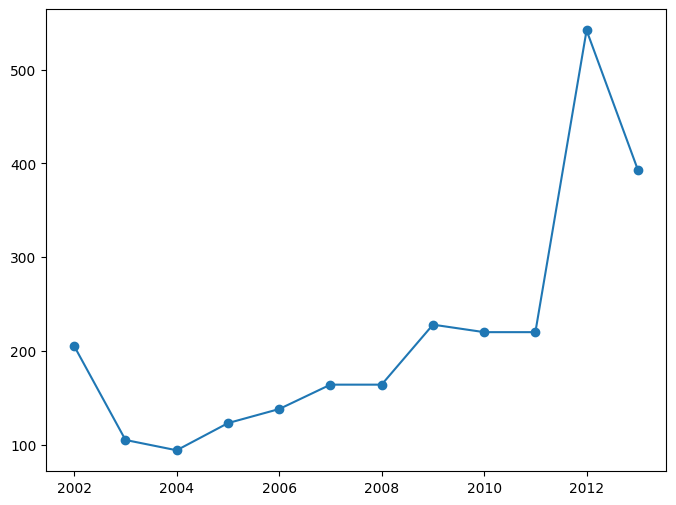

In [67]:
# On pourrait aussi le faire par année
# Cela montre peut être mieux la tendance du joueur

playerID = "l386"
column_mapping = {
    'match_date': 'match_date',
    'player1_atprank': 'player_atprank',
    'player2_atprank': 'player_atprank'
}

matchswon = df.loc[df["player1_id"]==playerID, ["match_date","player1_atprank"]].rename(columns=column_mapping)
matchslost = df.loc[df["player2_id"]==playerID, ["match_date","player2_atprank"]].rename(columns=column_mapping)
matchs = pd.concat([matchswon, matchslost], ignore_index=True)
df_monthly = matchs.resample('Y', on='match_date').last()
df_monthly = df_monthly.fillna(method='ffill')
plt.figure(figsize=(8, 6))
plt.plot(df_monthly.index, df_monthly['player_atprank'], marker='o', linestyle='-')

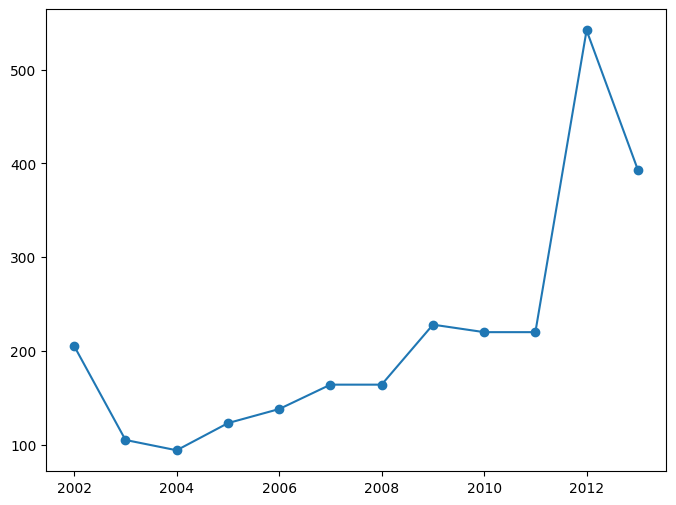

In [64]:
# On pourrait aussi le faire par année
# Cela montre peut être mieux la tendance du joueur

playerID = "l386"
column_mapping = {
    'match_date': 'match_date',
    'player1_atprank': 'player_atprank',
    'player2_atprank': 'player_atprank'
}

matchswon = df.loc[df["player1_id"]==playerID, ["match_date","player1_atprank"]].rename(columns=column_mapping)
matchslost = df.loc[df["player2_id"]==playerID, ["match_date","player2_atprank"]].rename(columns=column_mapping)
matchs = pd.concat([matchswon, matchslost], ignore_index=True)
df_monthly = matchs.resample('Y', on='match_date').last()
df_monthly = df_monthly.fillna(method='ffill')
plt.figure(figsize=(8, 6))
plt.plot(df_monthly.index, df_monthly['player_atprank'], marker='o', linestyle='-')